**libraries setup**

In [ ]:
!pip install --upgrade pip
!pip install --upgrade tensorflow
!pip install lime

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 421.8 MB 22 kB/s 
     |████████████████████████████████| 3.8 MB 41.9 MB/s 
     |████████████████████████████████| 448 kB 59.1 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 275 kB 2.9 MB/s 
  Created wheel for lime: filename=lime-0.1.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals  #backwards-compatibility and future-proofing

# imports tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# images and viewing/display
import matplotlib.pyplot as plt

# number processing
import numpy as np 

# file handling
import os
from glob import glob

In [ ]:
#' ' means CPU whereas '/device:G:0' means GPU
"""tf.test.gpu_device_name()"""

'tf.test.gpu_device_name()'

In [ ]:
# memory footprint support libraries/code
"""!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() """

'!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi\n!pip install gputil\n!pip install psutil\n!pip install humanize\nimport psutil\nimport humanize\nimport os\nimport GPUtil as GPU\nGPUs = GPU.getGPUs()\n# XXX: only one GPU on Colab and isn’t guaranteed\ngpu = GPUs[0]\ndef printm():\n process = psutil.Process(os.getpid())\n print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))\n print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))\nprintm() '

In [ ]:
"""!kill -9 -1"""

'!kill -9 -1'

In [ ]:
tf.__version__  # check tf version of runtime

'2.1.0'

In [ ]:
tf.executing_eagerly()

True

In [ ]:
IMG_HEIGHT = 775
IMG_WIDTH = 224
CLASS_NAMES = np.array(["Genuine","Forged"])
BATCH_SIZE = 30
EPOCH_SIZE = 1000

In [ ]:
np_load_old = np.load

np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
npzfile = np.load("/content/drive/My Drive/a_rs.npz")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
np.load = np_load_old

In [ ]:
a_g = npzfile['a_g']
print(a_g.shape)
a_f = npzfile['a_f']
print(a_f.shape)

(716, 224, 775, 1)
(2065, 224, 775, 1)


In [ ]:
Y = np.concatenate(([0]*a_g.shape[0],[1]*a_f.shape[0]), axis=0)
X = np.concatenate((a_g,a_f), axis=0)
print(Y[-10:])
print(X.shape)

[1 1 1 1 1 1 1 1 1 1]
(2781, 224, 775, 1)


In [ ]:
X_train = np.concatenate((X[102:a_g.shape[0]],X[102:a_g.shape[0]],X[102:a_g.shape[0]-72],X[a_g.shape[0]+295:]), axis=0)
print(X_train.shape)
X_val = np.concatenate((X[:102],X[a_g.shape[0]:(a_g.shape[0]+295)]), axis=0)
y_train = np.concatenate(([0]*1770,[1]*1770), axis=0)
print(y_train.shape)
y_val = np.concatenate(([0]*102,[1]*295), axis=0)

(3540, 224, 775, 1)
(3540,)


In [ ]:
indices = np.arange(y_train.shape[0])
np.random.shuffle(indices)
indices = list(indices)
print(indices)
X_train = X_train[indices]
y_train = y_train[indices]

[1036, 56, 2103, 1699, 445, 1147, 1352, 1187, 1143, 455, 684, 683, 1276, 2371, 2133, 1882, 1988, 1516, 1749, 2184, 1936, 826, 1019, 1685, 2226, 2233, 1236, 1892, 2220, 1786, 2284, 1959, 1849, 1604, 2294, 1648, 252, 270, 1467, 404, 1126, 680, 776, 751, 382, 2274, 283, 1880, 1325, 2086, 773, 604, 510, 814, 160, 318, 237, 1221, 2216, 88, 307, 293, 410, 1709, 648, 2142, 1748, 151, 892, 1119, 841, 1549, 1808, 2356, 1593, 810, 1520, 612, 590, 1319, 96, 1268, 2302, 558, 1523, 1120, 2165, 183, 63, 1217, 357, 354, 2306, 433, 1129, 1512, 395, 1841, 452, 1287, 269, 556, 1932, 169, 1505, 1598, 785, 1661, 2209, 1773, 1178, 514, 1175, 2232, 2155, 1290, 1980, 535, 768, 550, 218, 2126, 643, 1962, 116, 411, 1093, 1072, 1353, 1553, 1396, 1970, 1781, 1370, 2271, 2176, 480, 1432, 1702, 2190, 369, 317, 1097, 1136, 1034, 1993, 282, 1576, 131, 315, 28, 1863, 1380, 1306, 696, 620, 2214, 294, 170, 1753, 453, 181, 1875, 439, 481, 2383, 576, 1672, 1113, 51, 938, 1974, 1740, 618, 1313, 1416, 2252, 1700, 1295, 517

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(width_shift_range=0.3,
                                    height_shift_range=0.3,
                                    horizontal_flip=True,
                                    fill_mode='constant', 
                                    cval=1)

data_generator.fit(X_train)
data_iter = data_generator.flow(X_train, y_train, batch_size=BATCH_SIZE)

(30, 224, 775, 1)
(30, 224, 775, 1)
(30, 224, 775, 1)
(30, 224, 775, 1)
(30, 224, 775, 1)
(30, 224, 775, 1)
(30, 224, 775, 1)
(30, 224, 775, 1)
(30, 224, 775, 1)


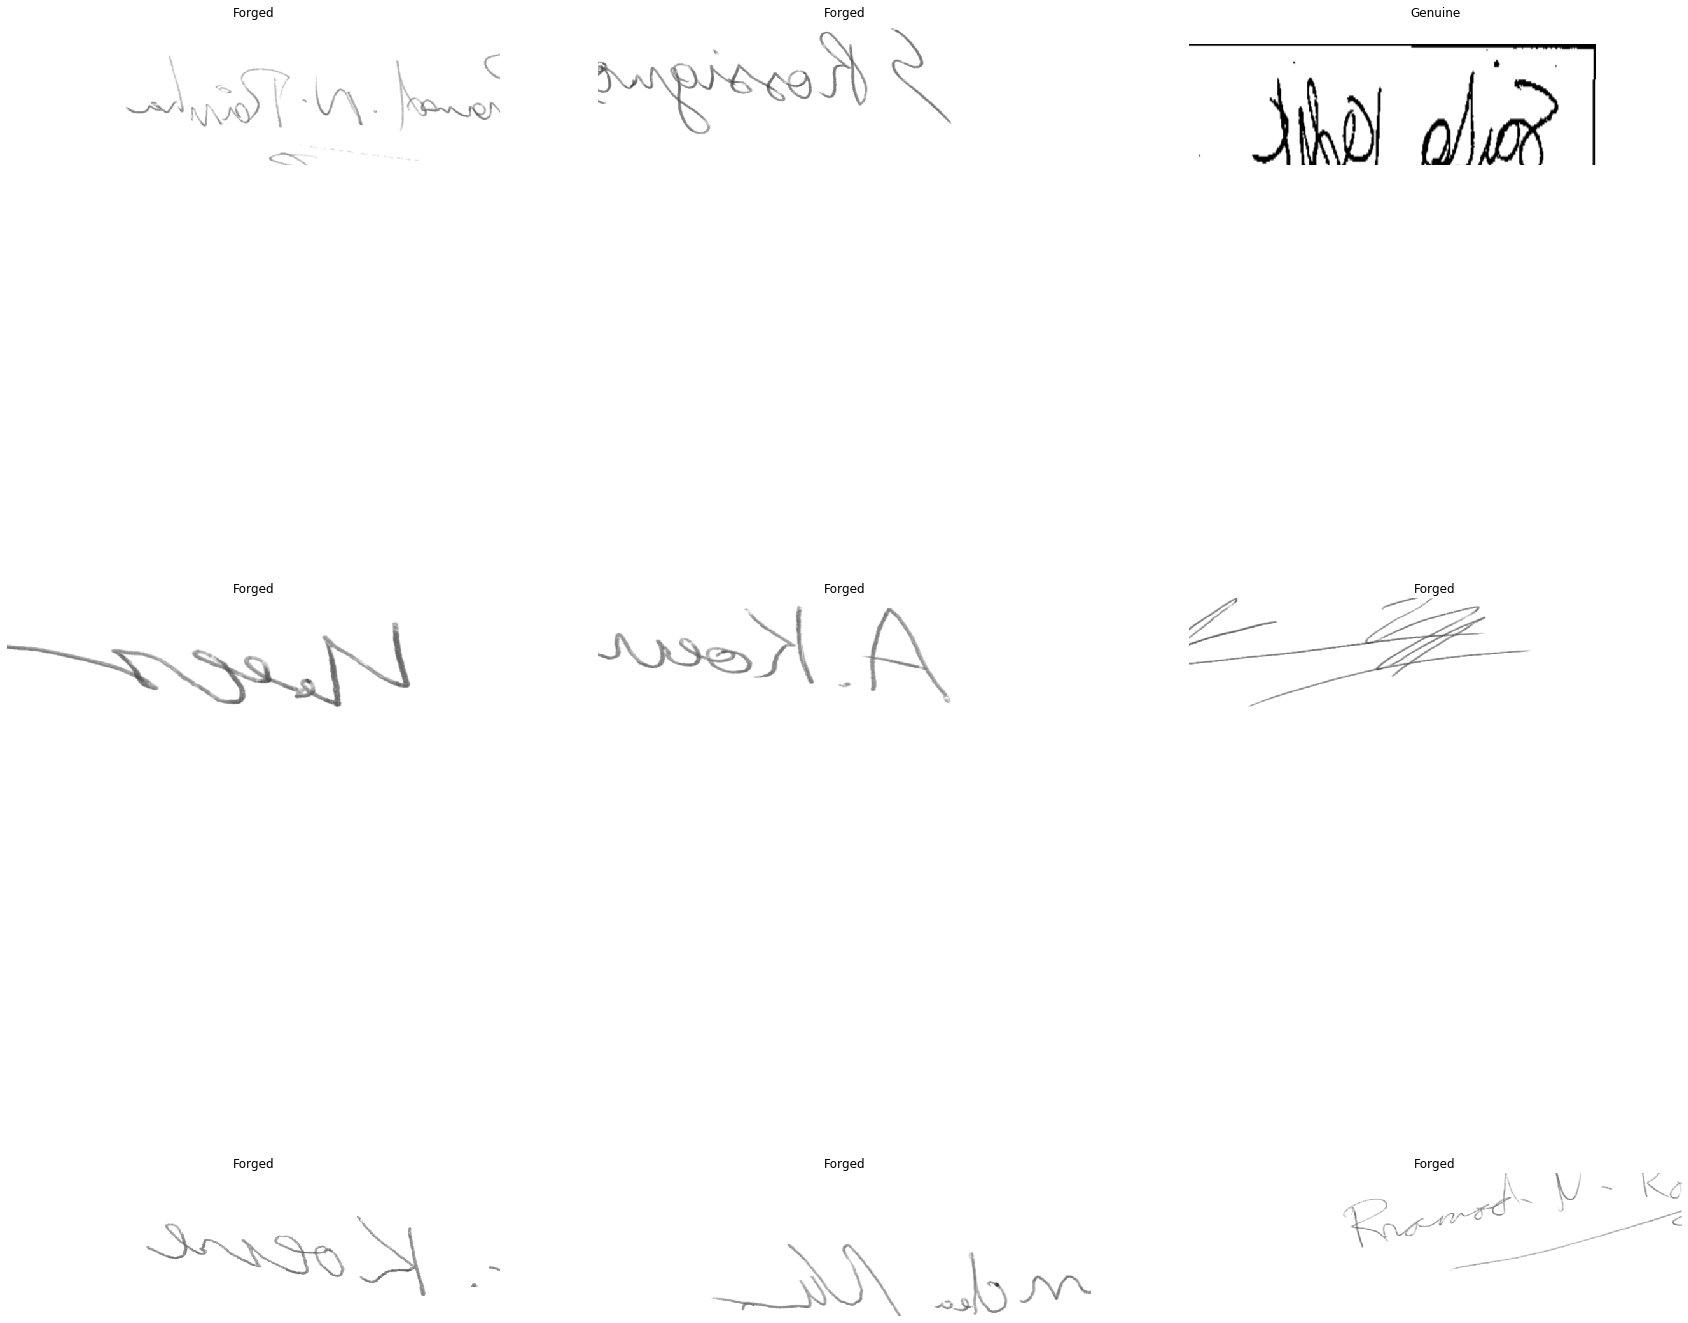

In [ ]:
# data iter
def show_batch(image_iter):
  oop = image_iter.next()
  plt.figure(figsize=(30,30))
  for n in range(9):
      ax = plt.subplot(3,3,n+1)
      
      plt.imshow(tf.image.grayscale_to_rgb(tf.convert_to_tensor(oop[0][n])), cmap=plt.cm.binary)
      plt.title(CLASS_NAMES[int(np.round(oop[1][n]))])
      print(oop[0].shape)
      plt.axis('off')

show_batch(data_iter)

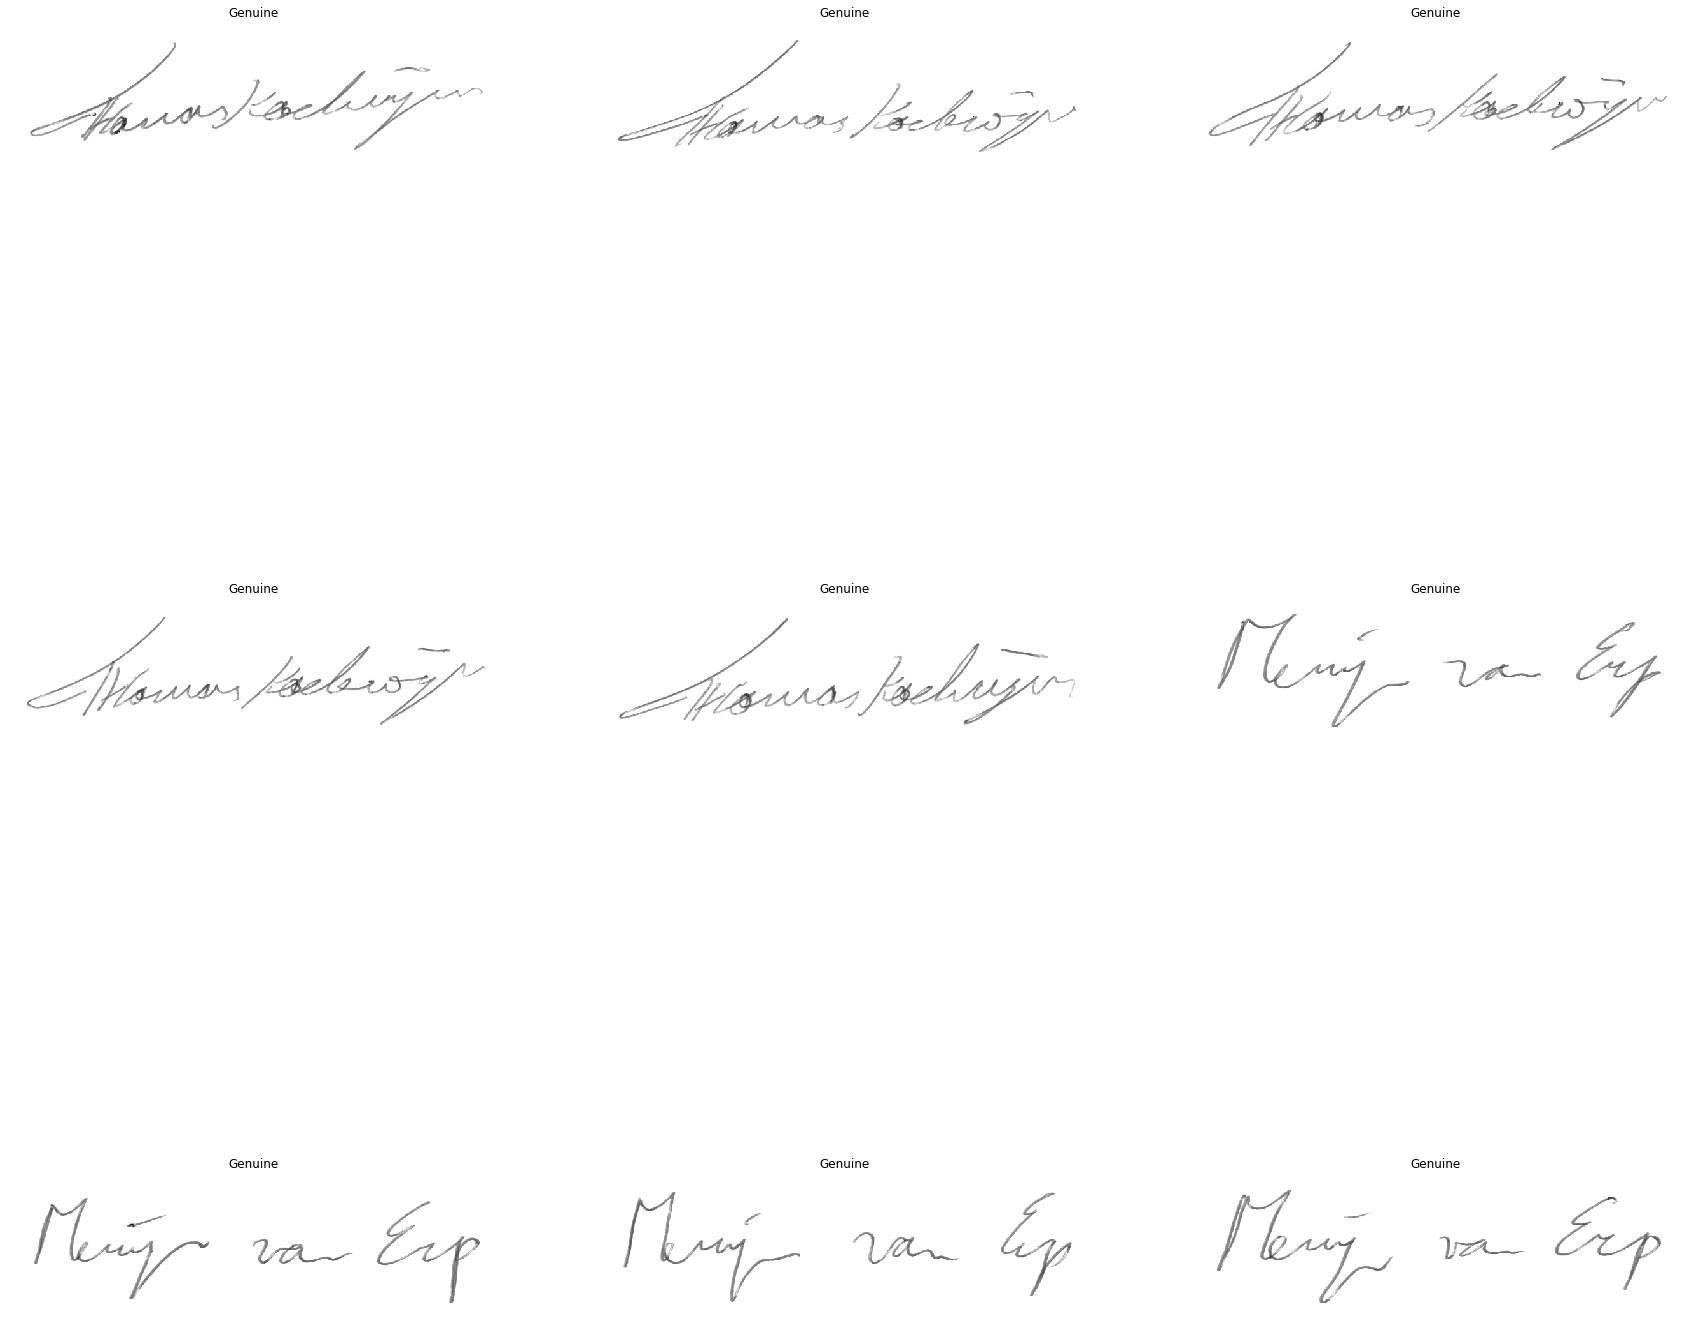

In [ ]:
# validation
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(30,30))
  for n in range(9):
      ax = plt.subplot(3,3,n+1)
      plt.imshow(tf.image.grayscale_to_rgb(tf.convert_to_tensor(image_batch[n])), cmap=plt.cm.binary)
      plt.title(CLASS_NAMES[label_batch[n]])
      plt.axis('off')

show_batch(X_val[:30],y_val[:30])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
model.add(tf.keras.layers.Dropout(0.25)) 
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
model.add(tf.keras.layers.Dropout(0.25)) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))  
model.add(tf.keras.layers.Dropout(0.5)) 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
    
model.compile(loss= keras.losses.binary_crossentropy, 
                  optimizer=opt, 
                  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 773, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 386, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 384, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 192, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 192, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 190, 128)      73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 95, 128)       0

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/checkpoints/weights3.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(data_iter, steps_per_epoch=X_train.shape[0]/BATCH_SIZE, epochs=EPOCH_SIZE, verbose=1, validation_data=(X_val,y_val), callbacks=callbacks_list)

'from keras.callbacks import ModelCheckpoint\nfilepath="/content/drive/My Drive/checkpoints/weights2.best.hdf5"\ncheckpoint = ModelCheckpoint(filepath, monitor=\'val_accuracy\', verbose=1, save_best_only=True, mode=\'max\')\ncallbacks_list = [checkpoint]\n\nhistory = model.fit(data_iter, steps_per_epoch=X_train.shape[0]/BATCH_SIZE, epochs=EPOCH_SIZE, verbose=1, validation_data=(X_val,y_val), callbacks=callbacks_list)'

In [ ]:
"""model.load_weights("/content/drive/My Drive/checkpoints/weights.best.hdf5")

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
    
model.compile(loss= keras.losses.binary_crossentropy, 
                  optimizer=opt, 
                  metrics=['accuracy'])"""

In [ ]:
print(y_val.shape)

val_g = np.where(y_val == 0)
print(len(val_g[0]))
bonk_g = model.evaluate(X_val[val_g], np.array([0]*len(val_g[0])), verbose=1)

val_f = np.where(y_val == 1)
print(len(val_f[0]))
bonk_f = model.evaluate(X_val[val_f], np.array([1]*len(val_f[0])), verbose=1)


(397,)
102
102/102 [==============================] - 8s 79ms/sample - loss: 1.2400 - accuracy: 0.5000
295
295/295 [==============================] - 2s 6ms/sample - loss: 0.0280 - accuracy: 1.0000


In [ ]:
predictions = model.predict(X_val)

[[1.0917465e-02]
 [9.8509860e-01]
 [1.9552451e-02]
 [5.2385661e-03]
 [7.3093488e-03]
 [9.3708628e-01]
 [9.8987788e-01]
 [9.4527119e-01]
 [9.6235752e-01]
 [9.6330220e-01]
 [7.0358223e-01]
 [4.4873503e-01]
 [8.9382535e-01]
 [7.9665196e-01]
 [7.4106950e-01]
 [4.5046755e-04]
 [2.8698004e-03]
 [1.1998384e-05]
 [1.6013142e-03]
 [8.8363886e-01]
 [8.5902953e-01]
 [8.3848095e-01]
 [8.2239366e-01]
 [8.5552531e-01]
 [8.5421818e-01]
 [8.2525384e-01]
 [8.9966917e-01]
 [8.8937819e-01]
 [9.1701728e-01]
 [8.0605406e-01]
 [8.9269525e-01]
 [8.6695009e-01]
 [8.6798924e-01]
 [9.3239087e-01]
 [9.1177350e-01]
 [9.3425685e-01]
 [8.9628381e-01]
 [8.9682233e-01]
 [9.4109315e-01]
 [8.9598364e-01]
 [8.7520903e-01]
 [7.8058207e-01]
 [9.0063566e-01]
 [8.9015943e-01]
 [8.7923992e-01]
 [7.8648353e-01]
 [3.4175369e-01]
 [8.7902641e-01]
 [8.5076559e-01]
 [8.6759752e-01]
 [9.4666559e-01]
 [9.1032290e-01]
 [9.2402321e-01]
 [9.7907627e-01]
 [9.3936336e-01]
 [9.4157284e-01]
 [9.8068088e-01]
 [9.4765353e-01]
 [9.7111762e-0

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(tf.image.grayscale_to_rgb(tf.convert_to_tensor(img)), cmap=plt.cm.binary)

  if abs(true_label-predictions_array[0]) < 0.5:
    color = 'blue'
  else:
    color = 'red'

  prediction = 0
  if predictions_array[0] < 0.5:
    prediction = 1-predictions_array[0]
  else:
    prediction = predictions_array[0]
  plt.xlabel("{} {:2.0f}% ({})".format(CLASS_NAMES[1-int(np.round(predictions_array))],
                                100*prediction,
                                CLASS_NAMES[1-true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([0,1], CLASS_NAMES)
  plt.yticks([])
  thisplot = plt.bar([0,1], [predictions_array[0],1-predictions_array[0]], color="#777777")
  plt.ylim([0, 1])
  predicted_label = predictions_array[0]

  predicted_label = 1-int(np.round(predictions_array))

  thisplot[predicted_label].set_color('red')
  thisplot[1-true_label].set_color('blue')

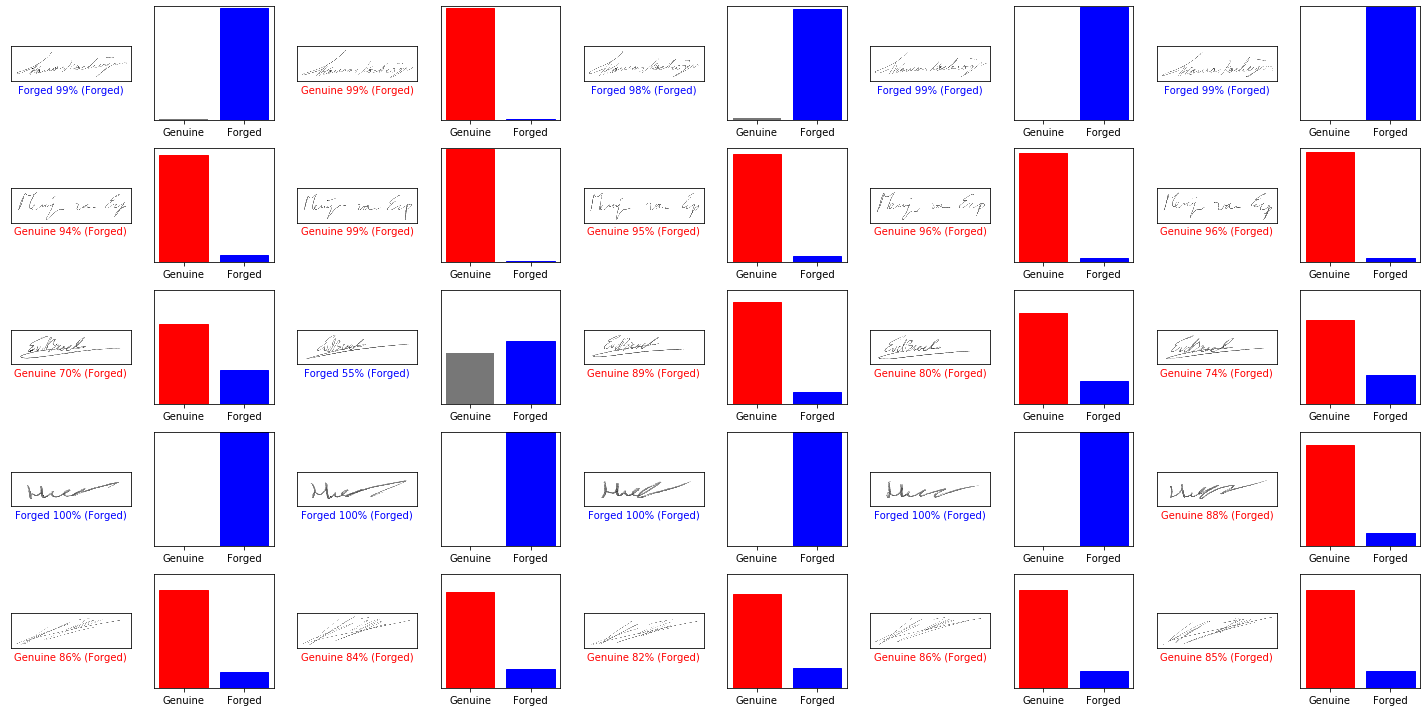

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_val, X_val)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_val)
plt.tight_layout()
plt.show()

In [ ]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer = lime_image.LimeImageExplainer() 
segmenter = SegmentationAlgorithm('felzenszwalb', scale=100, sigma=0.5, min_size=50)

In [ ]:
testindex = 7

explanation_1 = explainer.explain_instance(X_val[testindex], 
                classifier_fn = model.predict, 
                top_labels=2, 
                hide_color=0, 
                num_samples=10000,
                segmentation_fn=segmenter)

from skimage.segmentation import mark_boundaries
temp, mask = explanation_1.get_image_and_mask(explanation_1.top_labels[0], 
                                            positive_only=True, 
                                            num_features=20, 
                                            hide_rest=True)

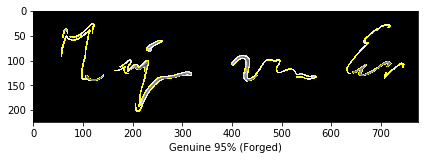

In [ ]:
plt.imshow(mark_boundaries(temp.reshape((224, 775)), mask))
plt.xlabel("{} {:2.0f}% ({})".format(CLASS_NAMES[1-int(np.round(predictions[testindex][0]))],
                                100*predictions[testindex][0],
                                CLASS_NAMES[1-y_val[testindex]]))
plt.tight_layout()